<a href="https://colab.research.google.com/github/uzzain/humanitydataanalysis/blob/main/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
wine_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
alcohol_content = [0, 0.9, 3.2, 4.1, 5.2, 8, 10, 11.1, 11.9]

X = np.array(alcohol_content).reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

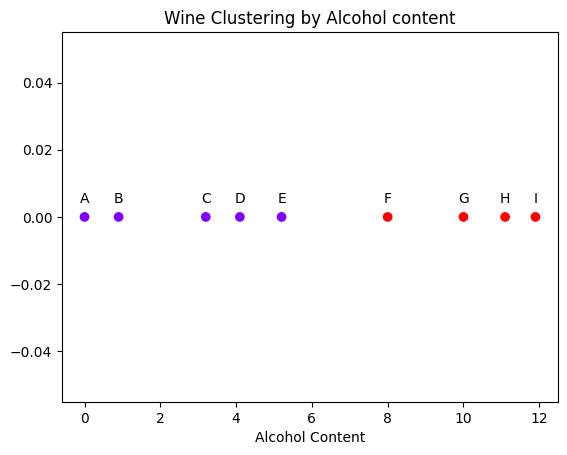

In [ ]:
labels = kmeans.labels_
wine_clustes = {wine_types[i] : labels[i] for i in range(len(wine_types))}

plt.scatter(X, np.zeros_like(X), c=labels, cmap='rainbow')

for i, txt in enumerate(wine_types):
  plt.annotate(txt, (X[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Alcohol Content')
plt.title('Wine Clustering by Alcohol content')
plt.show()

In [ ]:
import pandas as pd
from matplotlib import font_manager
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('score.xlsx')

In [ ]:
X = df.drop('학생', axis = 1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
student_names = df['학생']

In [18]:
df_scaled = pd.DataFrame(X_scaled, columns = ['생물', '화학', '영어', '국어', '수학'])
df_scaled['학생'] = student_names
print(df_scaled)

         생물        화학        영어        국어        수학    학생
0  0.901155  0.272727 -0.706620 -0.649063 -1.411313   학생1
1  0.901155 -0.636364 -1.134875 -0.649063 -1.411313   학생5
2  0.081923 -0.636364 -1.991384 -0.267261 -1.411313   학생6
3  0.901155  0.272727 -0.706620 -0.267261 -0.365896   학생8
4 -0.737309 -1.545455  1.006399 -1.030865  1.202229   학생2
5  0.901155  1.181818  0.364017 -0.267261  0.940875   학생4
6 -1.556541  0.272727  0.578144 -1.221766  0.679521   학생9
7 -0.737309 -1.545455  1.006399  1.450847  0.679521   학생3
8 -1.556541  1.181818  0.792271  1.641748  0.679521   학생7
9  0.901155  1.181818  0.792271  1.259946  0.418167  학생10


In [25]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

df['클러스터'] = kmeans.labels_
df_scaled['클러스터'] = kmeans.labels_
df.sort_values(by = '클러스터')

,학생,생물,화학,영어,국어,수학,클러스터
5,학생4,100,100,85,50,95,0
8,학생7,85,100,95,100,90,0
9,학생10,100,100,95,90,85,0
4,학생2,90,85,100,30,100,1
6,학생9,85,95,90,25,90,1
7,학생3,90,85,100,95,90,1
0,학생1,100,95,60,40,50,2
1,학생5,100,90,50,40,50,2
2,학생6,95,90,30,50,50,2
3,학생8,100,95,60,50,70,2


In [28]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

In [40]:
plt.rc('font', family='NanumBarunGothic.ttf')
# font_path='/content/drive/MyDrive/인문데이터분석/NanumBarunGothic.ttf'

plt.rcParams['axes.unicode_minus'] =False

In [41]:
cluster_means = df.drop('학생', axis = 1).groupby('클러스터').mean()

print(cluster_means)
cluster_std_means = df_scaled.drop('학생', axis = 1).groupby('클러스터').mean()

print(cluster_std_means)

cluster_std_means

             생물          화학         영어    국어         수학
클러스터                                                   
0     95.000000  100.000000  91.666667  80.0  90.000000
1     88.333333   88.333333  96.666667  50.0  93.333333
2     98.750000   92.500000  50.000000  45.0  55.000000
            생물        화학        영어        국어        수학
클러스터                                                  
0     0.081923  1.181818  0.649520  0.878144  0.679521
1    -1.010386 -0.939394  0.863647 -0.267261  0.853757
2     0.696347 -0.181818 -1.134875 -0.458162 -1.149958


,생물,화학,영어,국어,수학
클러스터,,,,,
0,0.081923,1.181818,0.649520,0.878144,0.679521
1,-1.010386,-0.939394,0.863647,-0.267261,0.853757
2,0.696347,-0.181818,-1.134875,-0.458162,-1.149958


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

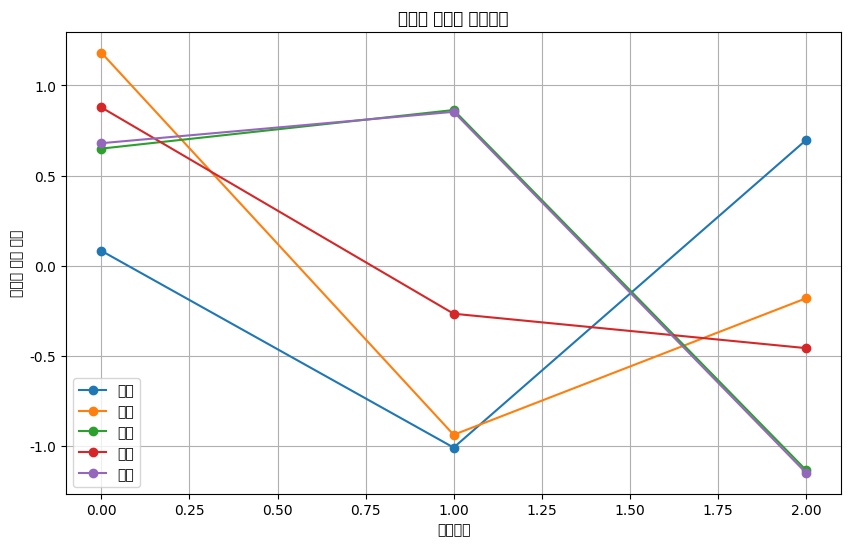

In [42]:
#과목별 상관관계 차트 그리기
plt.figure(figsize = (10, 6))
for subject in cluster_std_means.columns:
  plt.plot(cluster_std_means.index, cluster_std_means[subject], marker = 'o', label = subject)

plt.xlabel("클러스터")
plt.ylabel("표준화 평균 점수")
plt.title('군집과 과목의 상관관계')
plt.legend()
plt.grid(True)
plt.show()